# Analysing mock datasets

In [46]:
# packages

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import pandas as pd
import os
from itertools import combinations

import sys
sys.path.append("../src")

from analysis import *
from inference import *

In [47]:
import re

def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)] 
    return sorted(l, key=alphanum_key)

In [48]:
path = "../experiment_outputs/growth_meas_0.1/"

In [49]:
n_sp = 5

infer_out_files = [i for i in os.listdir(f"{path}/inference") if f"{n_sp}_sp" in i]
infer_out_files = natural_sort(infer_out_files)
metadatafiles = [f"metadata{i.split('infer_out_')[1][:-3]}txt" for i in infer_out_files]

In [50]:
metadict_list = []
for file in metadatafiles:
    metatext = open(f"{path}/metadata/"+file, "r").read().split("\n")
    metadict_list.append(get_meta(metatext))

metadict = metadict_list[0]

In [51]:
infer_out_list = [pd.read_csv(f"{path}/inference/{file}", index_col=0) for file in infer_out_files]
infer_out_all = pd.concat(infer_out_list)

In [52]:
infer_out_all.columns

Index(['n_init_cond', 'init_cond_idx', 't_samp_dist_idx', 'measurement_noise',
       'r1', 'r2', 'r3', 'r4', 'r5', 'A1,1', 'A1,2', 'A1,3', 'A1,4', 'A1,5',
       'A2,1', 'A2,2', 'A2,3', 'A2,4', 'A2,5', 'A3,1', 'A3,2', 'A3,3', 'A3,4',
       'A3,5', 'A4,1', 'A4,2', 'A4,3', 'A4,4', 'A4,5', 'A5,1', 'A5,2', 'A5,3',
       'A5,4', 'A5,5', 'MSPD', 'CSR', 'ES'],
      dtype='object')

In [53]:
n_sp = len([i for i in infer_out_all.columns if i[0]=="r"])

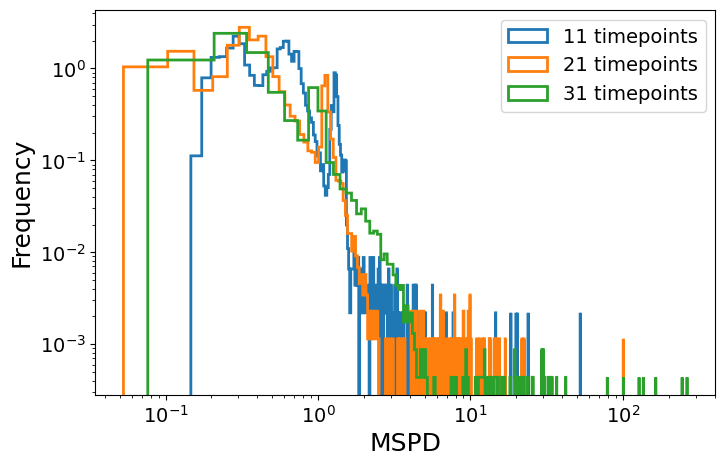

In [54]:
# MSPD frequency
plt.figure(figsize=(8,5))
for t_samp in infer_out_all.t_samp_dist_idx.unique():
    plt.hist(infer_out_all[infer_out_all.t_samp_dist_idx==t_samp].MSPD.values, 2000,
             histtype="step", label=f"{metadict['n_tpoints'][int(t_samp)]} timepoints", 
             lw=2, density=True)
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("MSPD", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale("log")
plt.yscale("log")
plt.show()

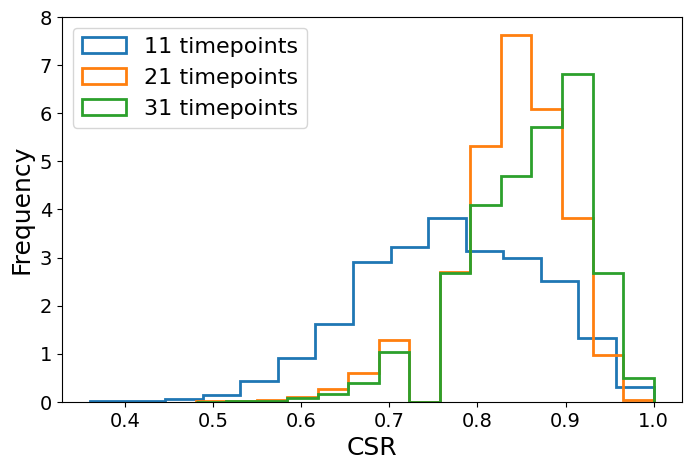

In [55]:
# CSR frequency over n_tpoints

plt.figure(figsize=(8, 5))
for t_samp in infer_out_all.t_samp_dist_idx.unique():
    plt.hist(infer_out_all[infer_out_all.t_samp_dist_idx==t_samp].CSR.values, 15,
             histtype="step", label=f"{metadict['n_tpoints'][int(t_samp)]} timepoints",
             lw=2, density=True)
plt.legend(loc="upper left", fontsize=16)
plt.xlabel("CSR", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

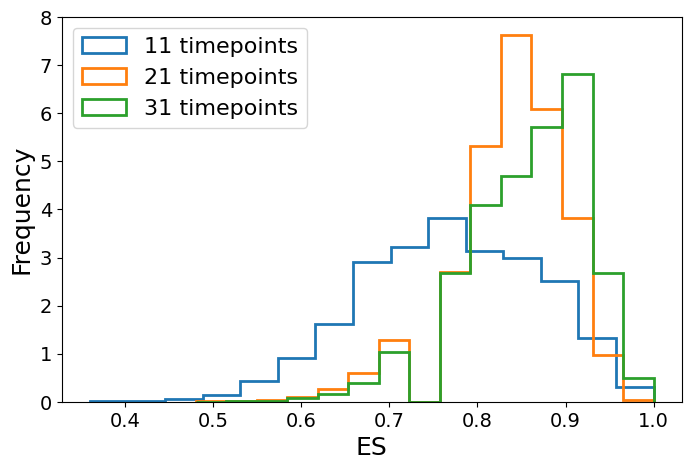

In [56]:
# ES frequency over n_tpoints

plt.figure(figsize=(8, 5))
for t_samp in infer_out_all.t_samp_dist_idx.unique():
    plt.hist(infer_out_all[infer_out_all.t_samp_dist_idx==t_samp].ES.values, 15,
             histtype="step", label=f"{metadict['n_tpoints'][int(t_samp)]} timepoints",
             lw=2, density=True)
plt.legend(loc="upper left", fontsize=16)
plt.xlabel("ES", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [57]:
# Difference between CSR and ES scores
(infer_out_all.CSR!=infer_out_all.ES).sum()

0

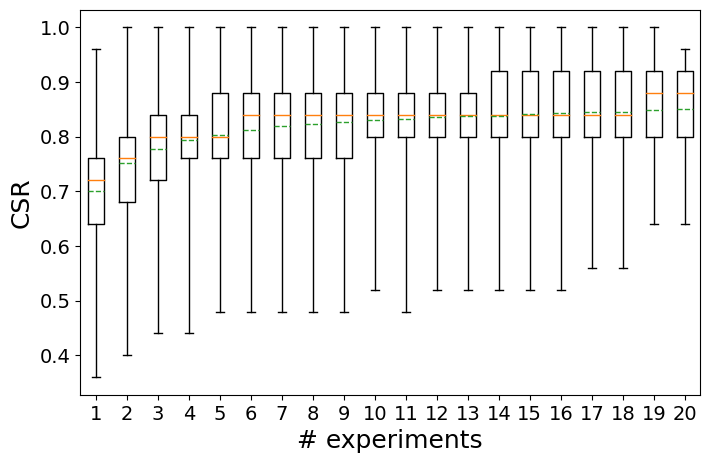

In [58]:
# CSR boxplots over # of experiments
CSR = [infer_out_all[infer_out_all.n_init_cond==i]["CSR"].values \
        for i in infer_out_all.n_init_cond.unique()]

plt.figure(figsize=(8,5))
plt.boxplot(CSR, whis=(0, 100), meanline=True, showmeans=True)
plt.xlabel("# experiments", fontsize=18)
plt.ylabel("CSR", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [59]:
metadict_list[0]["parameters"]

array([ 0.5488135 ,  0.71518937,  0.60276338,  0.54488318,  0.4236548 ,
       -2.45279477, -0.46250554, -1.0858006 ,  0.63973599, -0.38586334,
       -0.77576235, -2.82272027, -1.93320478,  0.24853063, -0.03124534,
       -0.13947396, -0.19065598, -2.61876164, -0.99242977, -0.22593966,
       -1.65457077, -0.63972264, -0.4794198 , -2.37006038, -0.77602047,
       -0.30736481, -0.36652394,  1.11971196, -0.45792242, -2.29271761])

In [60]:
(infer_out_list[0][["n_init_cond", "t_samp_dist_idx"]]==[1, 0]).all(axis=1)

0        True
1        True
2        True
3        True
4        True
        ...  
5218    False
5219    False
5220    False
5221    False
5222    False
Length: 5223, dtype: bool

In [61]:
p = metadict_list[0]["parameters"]
r = p[:n_sp]
A = p[n_sp:].reshape((n_sp, n_sp))
x_eq = -np.linalg.inv(A)@r

In [62]:
((metadict_list[0]["init_cond"]-x_eq)**2).mean(axis=1)

array([0.01861139, 0.01901419, 0.01911228, 0.01845336, 0.01937889,
       0.01982756, 0.01985595, 0.01926794, 0.01986138, 0.01949125,
       0.01940962, 0.01956366, 0.01933054, 0.02000751, 0.01913638,
       0.01955462, 0.01938504, 0.01973467, 0.02026731, 0.01983902])

In [63]:
metadict_list[0]["init_cond"][10]

array([0.01110603, 0.02018427, 0.01494539, 0.00682617, 0.01133316])

In [64]:
df_tmp = infer_out_list[0][(infer_out_list[0][["n_init_cond", "t_samp_dist_idx"]]==[1, 0]).all(axis=1)]
init_cond_idx = [int(re.match("[(]([0-9]+).0,[)]", i).group(1)) for i in df_tmp.init_cond_idx]
init_cond = metadict_list[0]["init_cond"][init_cond_idx]

In [65]:
metadict.keys()

dict_keys(['parameters', 'meas_noise', 'init_cond', 'n_init_cond', 't_samp', 'n_tpoints', 'avg_dt', 'env_noise', 't0', 'dt', 'seed', 'repetitions', 'scale_meas_noise_by_abund'])

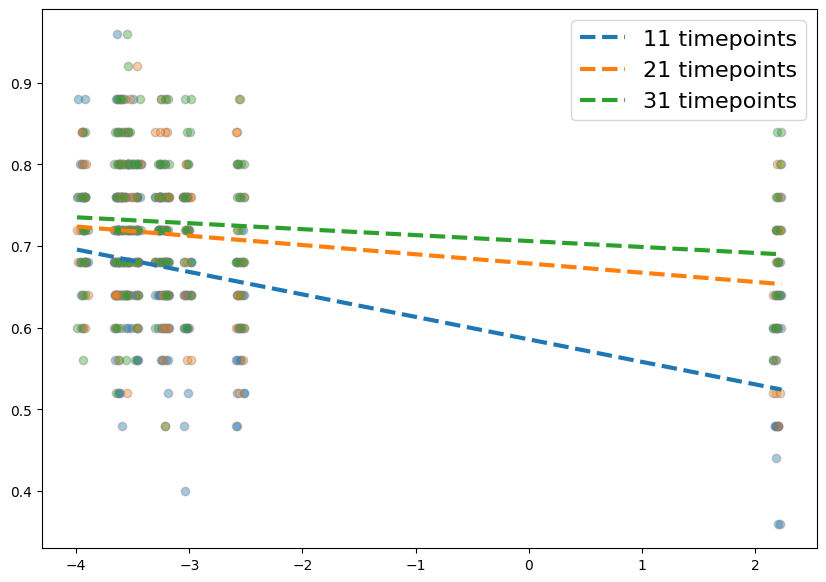

In [66]:
plt.figure(figsize=(10,7))

for j in range(len(metadict["n_tpoints"])):
    init_cond_msd = []
    csr = []
    for k in range(len(infer_out_list)):
        df_tmp = infer_out_list[k][(infer_out_list[k][["t_samp_dist_idx", "n_init_cond"]]==[j,1]).all(axis=1)]
        
        init_cond_idx = [int(re.findall("([0-9]+).0", i)[0]) for i in df_tmp.init_cond_idx]
        init_cond = metadict_list[k]["init_cond"][init_cond_idx]

        p = metadict_list[k]["parameters"]
        r = p[:n_sp]
        A = p[n_sp:].reshape((n_sp, n_sp))
        x_eq = -np.linalg.inv(A)@r

        init_cond_msd.append(((init_cond-x_eq)**2).mean(axis=1))
        csr.append(df_tmp.CSR.values)

        plt.scatter(np.log(((init_cond-x_eq)**2).mean(axis=1)), df_tmp.CSR, 
                    facecolors=f"C{j}", alpha=0.4, edgecolors="gray")

    init_cond_msd = np.concatenate(init_cond_msd)
    csr = np.concatenate(csr)

    reg = lm.LinearRegression()
    reg.fit(np.log(init_cond_msd).reshape((-1,1)), csr)
    plt.plot([np.log(init_cond_msd).min(), np.log(init_cond_msd).max()], 
             reg.predict([[np.log(init_cond_msd).min()], [np.log(init_cond_msd).max()]]),
             ls="--", lw=3, c=f"C{j}", label=f"{metadict['n_tpoints'][j]} timepoints")

# plt.xlabel()
plt.legend(fontsize=16)
plt.show()

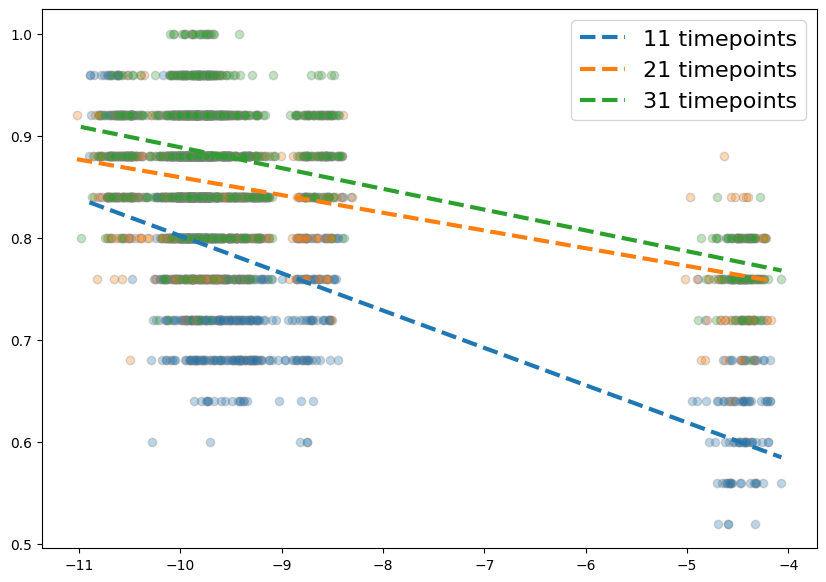

In [67]:
plt.figure(figsize=(10,7))

for j in range(len(metadict["n_tpoints"])):
    init_cond_var = []
    csr = []
    for k in range(len(infer_out_list)):
        df_tmp = infer_out_list[k][(infer_out_list[k][["t_samp_dist_idx", "n_init_cond"]]==[j,10]).all(axis=1)]
        
        init_cond_idx = [[int(m) for m in re.findall("([0-9]+).0", i)] for i in df_tmp.init_cond_idx.values]
        
        for l in range(len(init_cond_idx)):
            init_cond = metadict_list[k]["init_cond"][init_cond_idx[l]]

            init_cond_var.append(init_cond)
            csr.append(df_tmp.CSR.values[l])

    init_cond_var = np.array(init_cond_var).var(axis=1).mean(axis=1)
    csr = np.array(csr)

    plt.scatter(np.log(init_cond_var), csr, 
                facecolors=f"C{j}", alpha=0.3, edgecolors="gray")

    reg = lm.LinearRegression()
    reg.fit(np.log(init_cond_var).reshape((-1,1)), csr)
    plt.plot([np.log(init_cond_var).min(), np.log(init_cond_var).max()], 
             reg.predict([[np.log(init_cond_var).min()], [np.log(init_cond_var).max()]]),
             ls="--", lw=3, c=f"C{j}", label=f"{metadict['n_tpoints'][j]} timepoints")

# plt.xlabel()
plt.legend(fontsize=16)
plt.show()

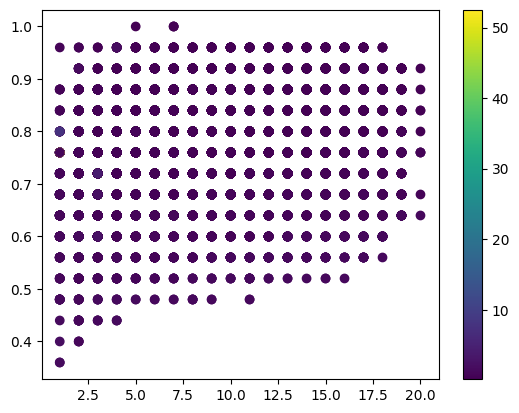

In [68]:
df_tmp = infer_out_all[infer_out_all.t_samp_dist_idx==0]
plt.scatter(df_tmp.n_init_cond, df_tmp.CSR, c=df_tmp.MSPD)
plt.colorbar()
plt.show()

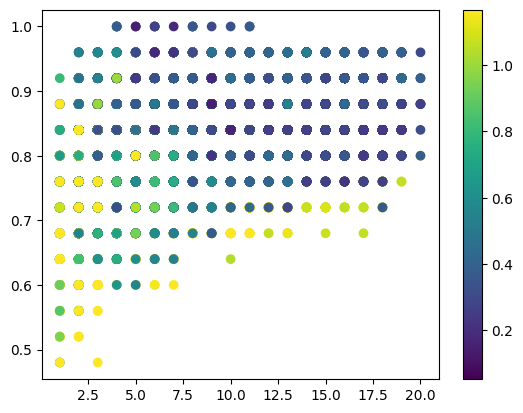

In [69]:
df_tmp = infer_out_all[infer_out_all.t_samp_dist_idx==1]
plt.scatter(df_tmp.n_init_cond, df_tmp.CSR, c=df_tmp.MSPD, vmax=np.percentile(df_tmp.MSPD, 95))
plt.colorbar()
plt.show()

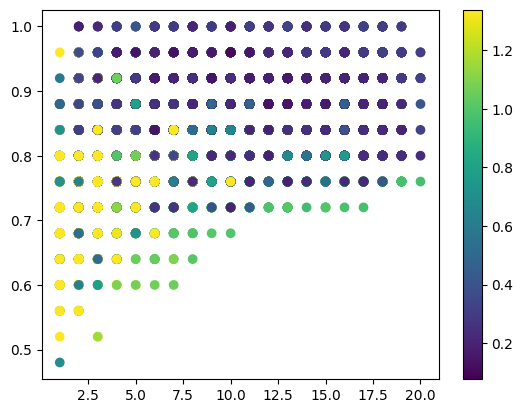

In [70]:
df_tmp = infer_out_all[infer_out_all.t_samp_dist_idx==2]
plt.scatter(df_tmp.n_init_cond, df_tmp.CSR, c=df_tmp.MSPD, vmax=np.percentile(df_tmp.MSPD, 95))
plt.colorbar()
plt.show()

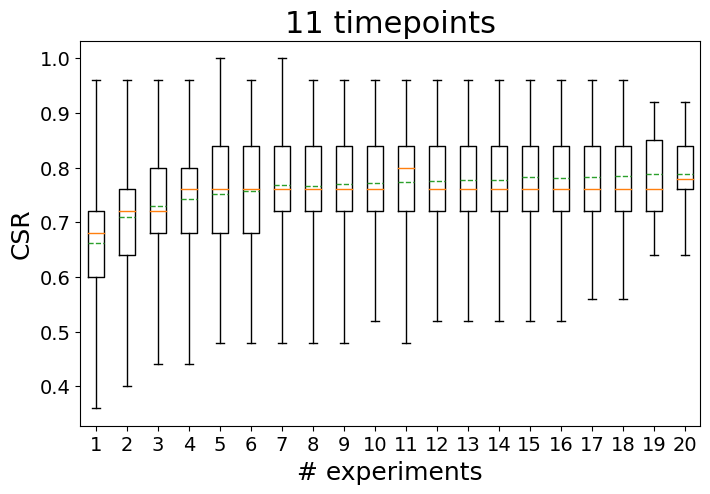

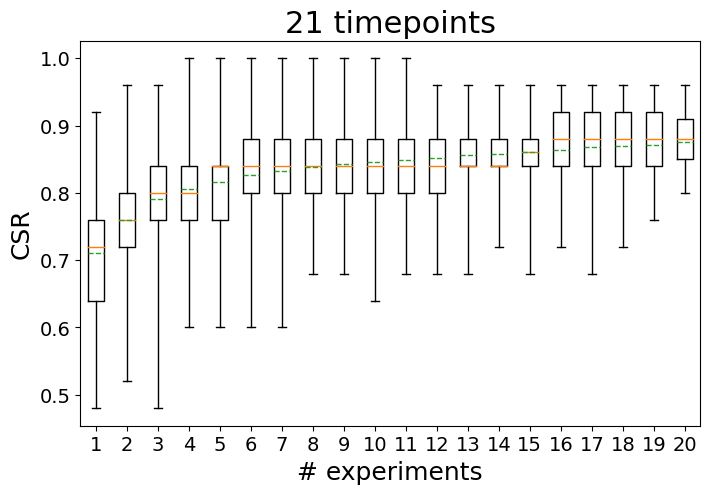

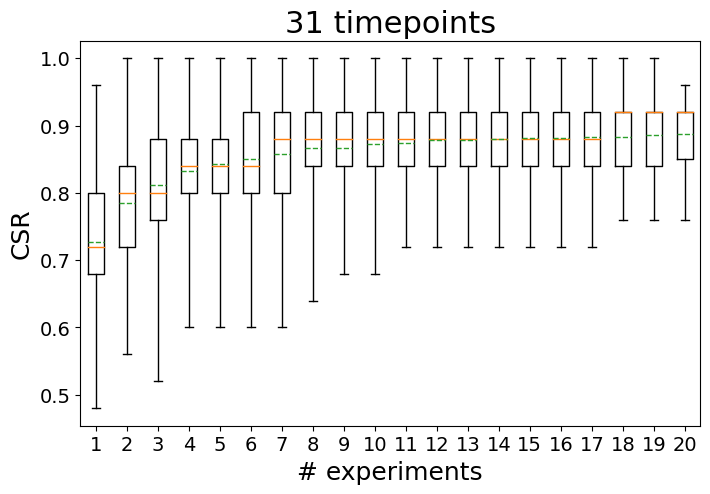

In [71]:
# CSR boxplot over # of experiments, by n_tpoints
for t_samp in infer_out_all.t_samp_dist_idx.unique():
    CSR = [infer_out_all[(infer_out_all[["n_init_cond", "t_samp_dist_idx"]]==[i,t_samp]).all(axis=1)]["CSR"].values \
            for i in infer_out_all.n_init_cond.unique()]

    plt.figure(figsize=(8,5))
    plt.title(f"{metadict['n_tpoints'][int(t_samp)]} timepoints", fontsize=22)
    plt.boxplot(CSR, whis=(0, 100), meanline=True, showmeans=True)
    plt.xlabel("# experiments", fontsize=18)
    plt.ylabel("CSR", fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

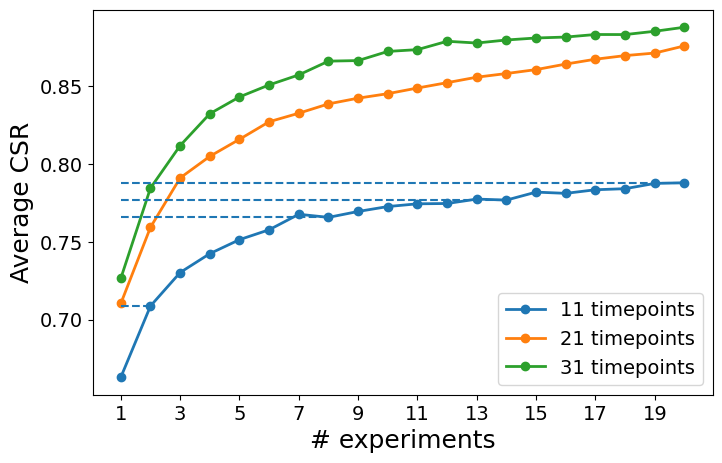

In [72]:
# average CSR over time
avgCSR = np.zeros((len(metadict["t_samp"]), len(metadict["init_cond"])))
for i in range(len(infer_out_all.t_samp_dist_idx.unique())):
    t_samp = infer_out_all.t_samp_dist_idx.unique()[i]
    for j in range(len(infer_out_all.n_init_cond.unique())):
        n_init_cond = infer_out_all.n_init_cond.unique()[j]
        avgCSR[i,j] = infer_out_all[(infer_out_all[["t_samp_dist_idx", "n_init_cond"]]==[t_samp, n_init_cond]).all(axis=1)]["CSR"].values.mean()

labels = [f"{i} timepoints" for i in metadict["n_tpoints"]]
plt.figure(figsize=(8,5))
for i in range(len(avgCSR)):
    plt.plot(np.arange(1, len(avgCSR[i])+1), avgCSR[i], "-o", lw=2, label=labels[i])
plt.legend(loc="lower right", fontsize=14)
plt.xlabel("# experiments", fontsize=18)
plt.ylabel("Average CSR", fontsize=18)
plt.xticks(np.arange(1, len(CSR)+1, 2), fontsize=14)
plt.yticks(fontsize=14)
for i in range(1, len(avgCSR[0]), 6):
    plt.hlines(avgCSR[0,i], 1, i+1, color="C0", ls="--")
    # plt.hlines(avgCSR[1,i], 1, i+1, color="C1")
plt.show()

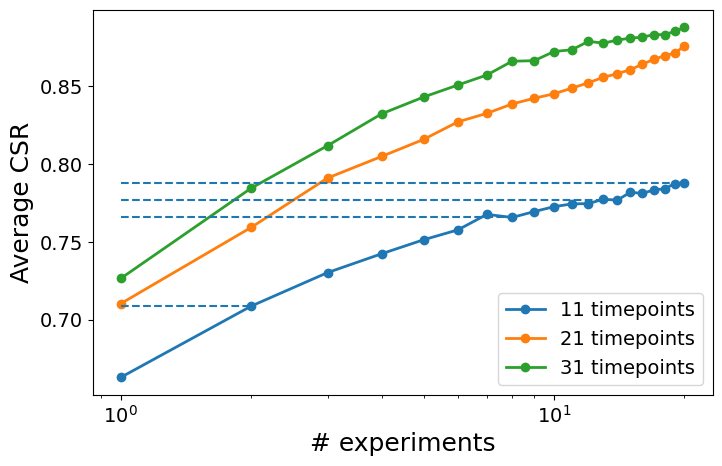

In [73]:
# average CSR over time
avgCSR = np.zeros((len(metadict["t_samp"]), len(metadict["init_cond"])))
for i in range(len(infer_out_all.t_samp_dist_idx.unique())):
    t_samp = infer_out_all.t_samp_dist_idx.unique()[i]
    for j in range(len(infer_out_all.n_init_cond.unique())):
        n_init_cond = infer_out_all.n_init_cond.unique()[j]
        avgCSR[i,j] = infer_out_all[(infer_out_all[["t_samp_dist_idx", "n_init_cond"]]==[t_samp, n_init_cond]).all(axis=1)]["CSR"].values.mean()

labels = [f"{i} timepoints" for i in metadict["n_tpoints"]]
plt.figure(figsize=(8,5))
for i in range(len(avgCSR)):
    plt.plot(np.arange(1, len(avgCSR[i])+1), avgCSR[i], "-o", lw=2, label=labels[i])
plt.legend(loc="lower right", fontsize=14)
plt.xlabel("# experiments", fontsize=18)
plt.ylabel("Average CSR", fontsize=18)
plt.xticks(np.arange(1, len(CSR)+1, 2), fontsize=14)
plt.yticks(fontsize=14)
for i in range(1, len(avgCSR[0]), 6):
    plt.hlines(avgCSR[0,i], 1, i+1, color="C0", ls="--")
    # plt.hlines(avgCSR[1,i], 1, i+1, color="C1")
plt.xscale("log")
plt.show()

In [74]:
# CSR ratios

tpoints_ratio01 = []
CSR_ratio01 = []
tpoints_ratio02 = []
CSR_ratio02 = []
tpoints_ratio12 = []
CSR_ratio12 = []

for i in range(len(avgCSR[0])):
    for j in range(len(avgCSR[1])):
        tpoints_ratio01.append(20*(j+1)/(10*(i+1)))
        CSR_ratio01.append(avgCSR[1,j]/avgCSR[0,i])
        tpoints_ratio02.append(30*(j+1)/(10*(i+1)))
        CSR_ratio02.append(avgCSR[2,j]/avgCSR[0,i])
        tpoints_ratio12.append(30*(j+1)/(20*(i+1)))
        CSR_ratio12.append(avgCSR[2,j]/avgCSR[1,i])

tpoints_ratio01 = np.array(tpoints_ratio01)
CSR_ratio01 = np.array(CSR_ratio01)
tpoints_ratio02 = np.array(tpoints_ratio02)
CSR_ratio02 = np.array(CSR_ratio02)
tpoints_ratio12 = np.array(tpoints_ratio12)
CSR_ratio12 = np.array(CSR_ratio12)

tpoints_ratio = np.concatenate((tpoints_ratio01, tpoints_ratio02, tpoints_ratio12))
CSR_ratio = np.concatenate((CSR_ratio01, CSR_ratio02, CSR_ratio12))

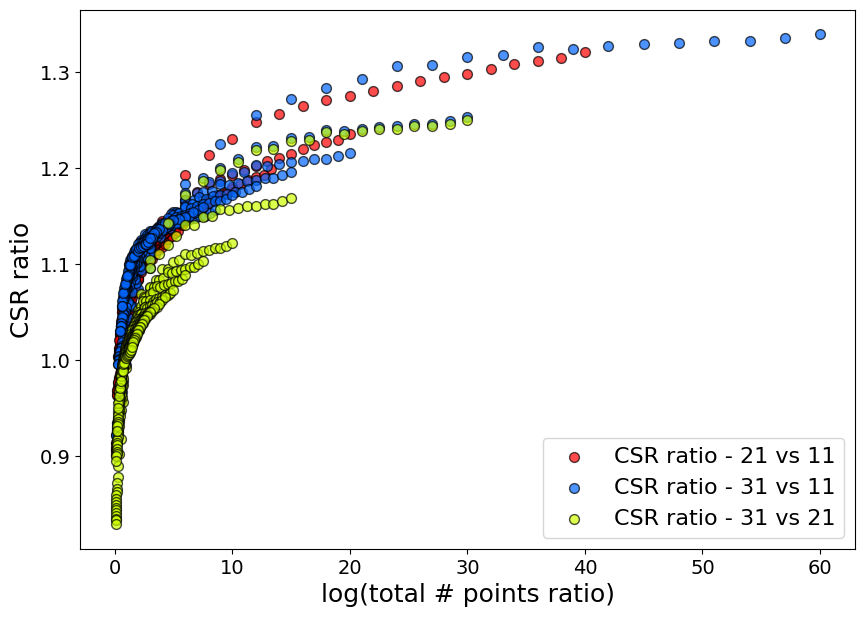

In [75]:
# CSR_ratio vs tpoints ratio
plt.figure(figsize=(10,7))

#01 ---
plt.scatter(tpoints_ratio01, CSR_ratio01, facecolors=hsv_to_rgb((0,1,1)), edgecolors="k", 
            label="CSR ratio - 21 vs 11", s=50, alpha=0.7)

# 02 ---
plt.scatter(tpoints_ratio02, CSR_ratio02, facecolors=hsv_to_rgb((0.6,1,1)), edgecolors="k", 
            label="CSR ratio - 31 vs 11", s=50, alpha=0.7)

#12 ---
plt.scatter(tpoints_ratio12, CSR_ratio12, facecolors=hsv_to_rgb((0.2,1,1)), edgecolors="k", 
            label="CSR ratio - 31 vs 21", s=50, alpha=0.7)

plt.xlabel("log(total # points ratio)", fontsize=18)
plt.ylabel("CSR ratio", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.show()

20 vs 10 timepoints:
CSR_ratio vs log(tpoints_ratio): R2 score = 0.9446602511102451
intercept = 1.05436, slope = 0.06189

--------------------------------
30 vs 10 timepoints:
CSR_ratio vs log(tpoints_ratio): R2 score = 0.9259964694706926
intercept = 1.05834, slope = 0.06127

--------------------------------
30 vs 20 timepoints:
CSR_ratio vs log(tpoints_ratio): R2 score = 0.9416017087298717
intercept = 1.00302, slope = 0.06289

--------------------------------
all ratios:
CSR_ratio vs log(tpoints_ratio): R2 score = 0.8663031018505158
intercept = 1.03513, slope = 0.06646


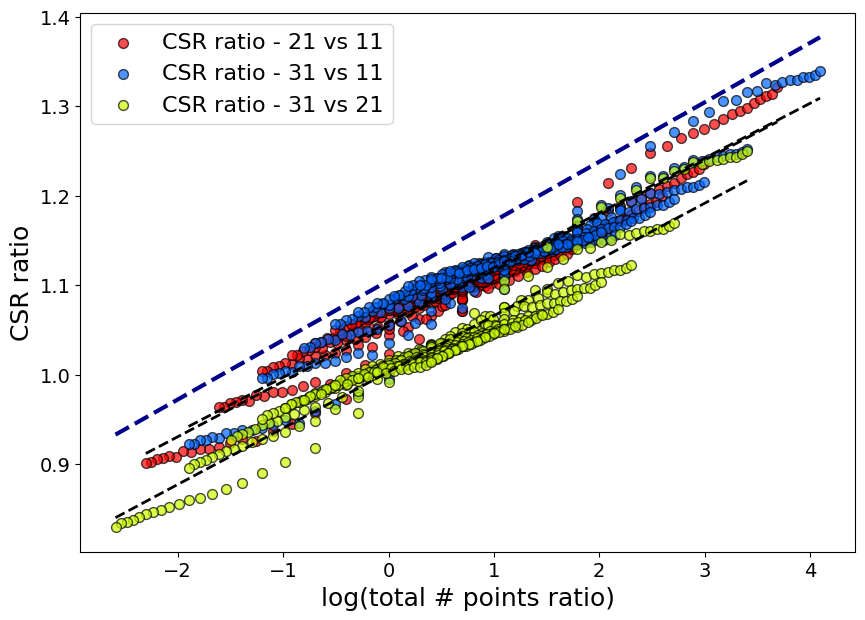

In [76]:
# CSR_ratio vs log(tpoints ratio)
plt.figure(figsize=(10,7))

#01 ---
plt.scatter(np.log(tpoints_ratio01), CSR_ratio01, facecolors=hsv_to_rgb((0,1,1)), edgecolors="k", 
            label="CSR ratio - 21 vs 11", s=50, alpha=0.7)
reg = lm.LinearRegression()
reg.fit(np.log(tpoints_ratio01).reshape((-1,1)), CSR_ratio01)
x_ext = np.array([np.min(np.log(tpoints_ratio01)), np.max(np.log(tpoints_ratio01))])
plt.plot(x_ext, reg.predict(x_ext.reshape((-1,1))), c="k", lw=2, ls="--")

print("20 vs 10 timepoints:")
print("CSR_ratio vs log(tpoints_ratio): R2 score =", reg.score(np.log(tpoints_ratio01).reshape((-1,1)), CSR_ratio01))
print(f"intercept = {reg.intercept_:.5f}, slope = {reg.coef_[0]:.5f}")

# 02 ---
plt.scatter(np.log(tpoints_ratio02), CSR_ratio02, facecolors=hsv_to_rgb((0.6,1,1)), edgecolors="k", 
            label="CSR ratio - 31 vs 11", s=50, alpha=0.7)
reg = lm.LinearRegression()
reg.fit(np.log(tpoints_ratio02).reshape((-1,1)), CSR_ratio02)
x_ext = np.array([np.min(np.log(tpoints_ratio02)), np.max(np.log(tpoints_ratio02))])
plt.plot(x_ext, reg.predict(x_ext.reshape((-1,1))), c="k", lw=2, ls="--")

print("\n--------------------------------")
print("30 vs 10 timepoints:")
print("CSR_ratio vs log(tpoints_ratio): R2 score =", reg.score(np.log(tpoints_ratio02).reshape((-1,1)), CSR_ratio02))
print(f"intercept = {reg.intercept_:.5f}, slope = {reg.coef_[0]:.5f}")

#12 ---
plt.scatter(np.log(tpoints_ratio12), CSR_ratio12, facecolors=hsv_to_rgb((0.2,1,1)), edgecolors="k", 
            label="CSR ratio - 31 vs 21", s=50, alpha=0.7)
reg = lm.LinearRegression()
reg.fit(np.log(tpoints_ratio12).reshape((-1,1)), CSR_ratio12)
x_ext = np.array([np.min(np.log(tpoints_ratio12)), np.max(np.log(tpoints_ratio12))])
plt.plot(x_ext, reg.predict(x_ext.reshape((-1,1))), c="k", lw=2, ls="--")

print("\n--------------------------------")
print("30 vs 20 timepoints:")
print("CSR_ratio vs log(tpoints_ratio): R2 score =", reg.score(np.log(tpoints_ratio12).reshape((-1,1)), CSR_ratio12))
print(f"intercept = {reg.intercept_:.5f}, slope = {reg.coef_[0]:.5f}")

reg = lm.LinearRegression()
reg.fit(np.log(tpoints_ratio).reshape((-1,1)), CSR_ratio)
x_ext = np.array([np.min(np.log(tpoints_ratio)), np.max(np.log(tpoints_ratio))])
plt.plot(x_ext, reg.predict(x_ext.reshape((-1,1)))+0.07, c="darkblue", lw=3, ls="--")

print("\n--------------------------------")
print("all ratios:")
print("CSR_ratio vs log(tpoints_ratio): R2 score =", reg.score(np.log(tpoints_ratio).reshape((-1,1)), CSR_ratio))
print(f"intercept = {reg.intercept_:.5f}, slope = {reg.coef_[0]:.5f}")

plt.xlabel("log(total # points ratio)", fontsize=18)
plt.ylabel("CSR ratio", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.show()

20 vs 10 timepoints:
log(CSR_ratio) vs log(tpoints_ratio): R2 score = 0.9407548714758414
intercept = 0.05140, slope = 0.05668

--------------------------------
30 vs 10 timepoints:
log(CSR_ratio) vs log(tpoints_ratio): R2 score = 0.9209770907925071
intercept = 0.05618, slope = 0.05475

--------------------------------
30 vs 20 timepoints:
log(CSR_ratio) vs log(tpoints_ratio): R2 score = 0.945751202399859
intercept = 0.00086, slope = 0.06114

--------------------------------
all ratios:
log(CSR_ratio) vs log(tpoints_ratio): R2 score = 0.8616184400176683
intercept = 0.03237, slope = 0.06169


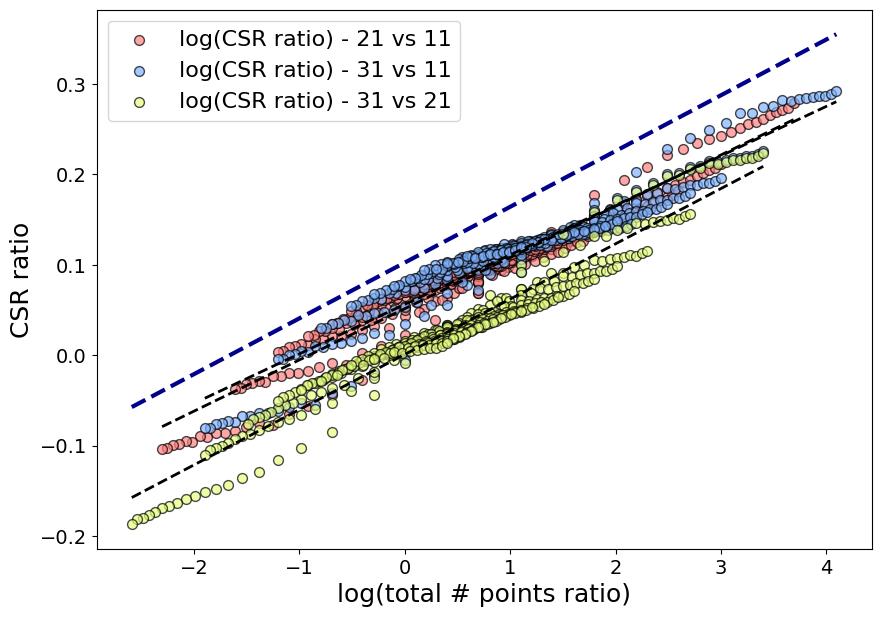

In [77]:
# log(CSR_ratio) vs log(tpoints_ratio)

plt.figure(figsize=(10,7))

#01 ---
plt.scatter(np.log(tpoints_ratio01), np.log(CSR_ratio01), facecolors=hsv_to_rgb((0,0.5,1)), edgecolors="k", 
            label="log(CSR ratio) - 21 vs 11", s=50, alpha=0.7)
reg = lm.LinearRegression()
reg.fit(np.log(tpoints_ratio01).reshape((-1,1)), np.log(CSR_ratio01))
x_ext = np.array([np.min(np.log(tpoints_ratio01)), np.max(np.log(tpoints_ratio01))])
plt.plot(x_ext, reg.predict(x_ext.reshape((-1,1))), c="k", lw=2, ls="--")

print("20 vs 10 timepoints:")
print("log(CSR_ratio) vs log(tpoints_ratio): R2 score =", reg.score(np.log(tpoints_ratio01).reshape((-1,1)), np.log(CSR_ratio01)))
print(f"intercept = {reg.intercept_:.5f}, slope = {reg.coef_[0]:.5f}")

# 02 ---
plt.scatter(np.log(tpoints_ratio02), np.log(CSR_ratio02), facecolors=hsv_to_rgb((0.6,0.5,1)), edgecolors="k", 
            label="log(CSR ratio) - 31 vs 11", s=50, alpha=0.7)
reg = lm.LinearRegression()
reg.fit(np.log(tpoints_ratio02).reshape((-1,1)), np.log(CSR_ratio02))
x_ext = np.array([np.min(np.log(tpoints_ratio02)), np.max(np.log(tpoints_ratio02))])
plt.plot(x_ext, reg.predict(x_ext.reshape((-1,1))), c="k", lw=2, ls="--")

print("\n--------------------------------")
print("30 vs 10 timepoints:")
print("log(CSR_ratio) vs log(tpoints_ratio): R2 score =", reg.score(np.log(tpoints_ratio02).reshape((-1,1)), np.log(CSR_ratio02)))
print(f"intercept = {reg.intercept_:.5f}, slope = {reg.coef_[0]:.5f}")

#12 ---
plt.scatter(np.log(tpoints_ratio12), np.log(CSR_ratio12), facecolors=hsv_to_rgb((0.2,0.5,1)), edgecolors="k", 
            label="log(CSR ratio) - 31 vs 21", s=50, alpha=0.7)
reg = lm.LinearRegression()
reg.fit(np.log(tpoints_ratio12).reshape((-1,1)), np.log(CSR_ratio12))
x_ext = np.array([np.min(np.log(tpoints_ratio12)), np.max(np.log(tpoints_ratio12))])
plt.plot(x_ext, reg.predict(x_ext.reshape((-1,1))), c="k", lw=2, ls="--")

print("\n--------------------------------")
print("30 vs 20 timepoints:")
print("log(CSR_ratio) vs log(tpoints_ratio): R2 score =", reg.score(np.log(tpoints_ratio12).reshape((-1,1)), np.log(CSR_ratio12)))
print(f"intercept = {reg.intercept_:.5f}, slope = {reg.coef_[0]:.5f}")

reg = lm.LinearRegression()
reg.fit(np.log(tpoints_ratio).reshape((-1,1)), np.log(CSR_ratio))
x_ext = np.array([np.min(np.log(tpoints_ratio)), np.max(np.log(tpoints_ratio))])
plt.plot(x_ext, reg.predict(x_ext.reshape((-1,1)))+0.07, c="darkblue", lw=3, ls="--")

print("\n--------------------------------")
print("all ratios:")
print("log(CSR_ratio) vs log(tpoints_ratio): R2 score =", reg.score(np.log(tpoints_ratio).reshape((-1,1)), np.log(CSR_ratio)))
print(f"intercept = {reg.intercept_:.5f}, slope = {reg.coef_[0]:.5f}")

plt.xlabel("log(total # points ratio)", fontsize=18)
plt.ylabel("CSR ratio", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)
plt.show()

R2 score = 0.6039468227582934


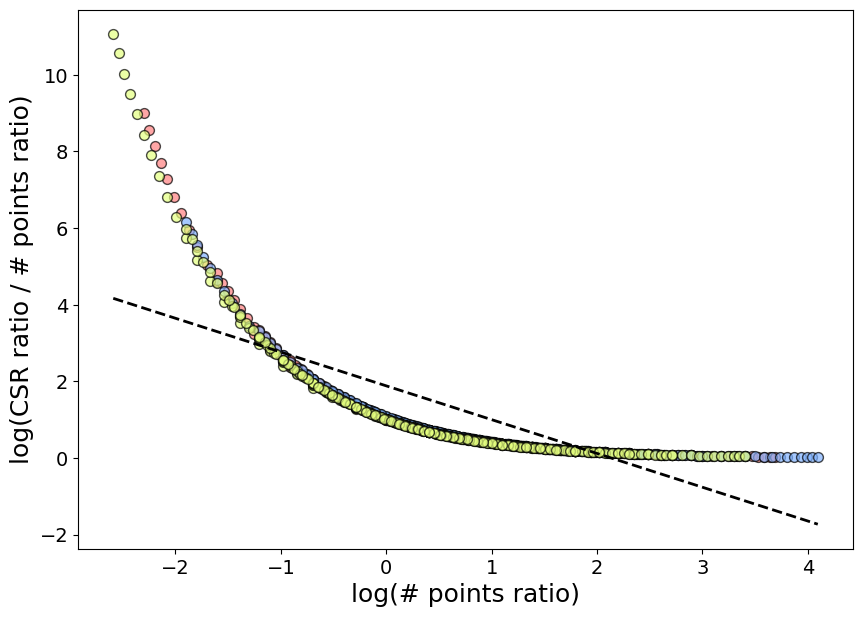

In [78]:
# CSR_ratio/tpoints_ratio vs log(tpoints_ratio)

plt.figure(figsize=(10,7))

plt.scatter(np.log(tpoints_ratio01), CSR_ratio01/tpoints_ratio01, 
            facecolors=hsv_to_rgb((0,0.5,1)), edgecolors="k", s=50, alpha=0.7)

plt.scatter(np.log(tpoints_ratio02), CSR_ratio02/tpoints_ratio02, 
            facecolors=hsv_to_rgb((0.6,0.5,1)), edgecolors="k", s=50, alpha=0.7)

plt.scatter(np.log(tpoints_ratio12), CSR_ratio12/tpoints_ratio12, 
            facecolors=hsv_to_rgb((0.2,0.5,1)), edgecolors="k", s=50, alpha=0.7)

reg = lm.LinearRegression()
tpoints_ratio = np.concatenate((tpoints_ratio01, tpoints_ratio02, tpoints_ratio12))
CSR_ratio = np.concatenate((CSR_ratio01, CSR_ratio02, CSR_ratio12))
reg.fit(np.log(tpoints_ratio).reshape((-1,1)), CSR_ratio/tpoints_ratio)
x_ext = np.array([np.min(np.log(tpoints_ratio)), np.max(np.log(tpoints_ratio))])
plt.plot(x_ext, reg.predict(x_ext.reshape((-1,1)))+0.3, c="k", lw=2, ls="--")

print("R2 score =", reg.score(np.log(tpoints_ratio).reshape((-1,1)), CSR_ratio/tpoints_ratio))

plt.xlabel("log(# points ratio)", fontsize=18)
plt.ylabel("log(CSR ratio / # points ratio)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

R2 score = 0.999306313321158


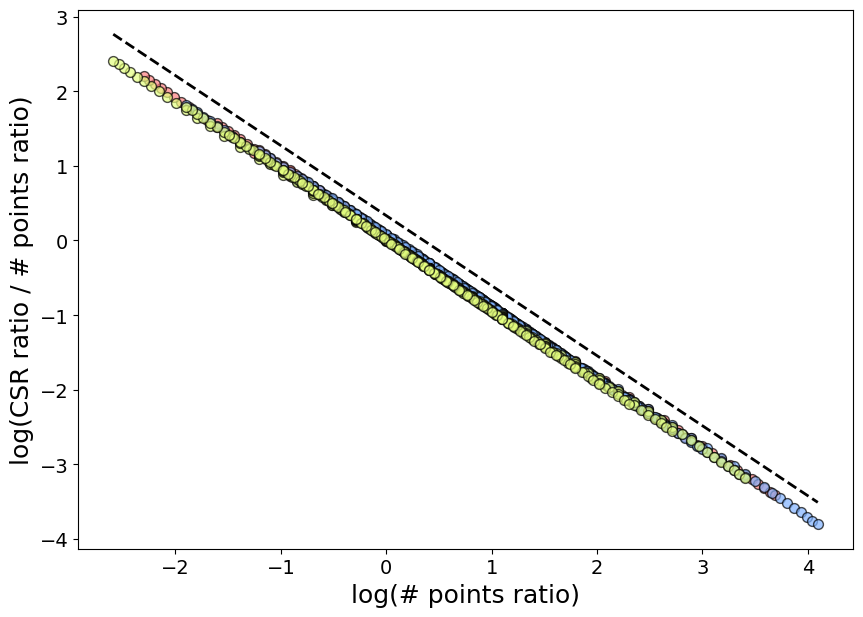

In [79]:
# log(CSR_ratio/tpoints_ratio) vs log(tpoints_ratio)

plt.figure(figsize=(10,7))

plt.scatter(np.log(tpoints_ratio01), np.log(CSR_ratio01/tpoints_ratio01), 
            facecolors=hsv_to_rgb((0,0.5,1)), edgecolors="k", s=50, alpha=0.7)

plt.scatter(np.log(tpoints_ratio02), np.log(CSR_ratio02/tpoints_ratio02), 
            facecolors=hsv_to_rgb((0.6,0.5,1)), edgecolors="k", s=50, alpha=0.7)

plt.scatter(np.log(tpoints_ratio12), np.log(CSR_ratio12/tpoints_ratio12), 
            facecolors=hsv_to_rgb((0.2,0.5,1)), edgecolors="k", s=50, alpha=0.7)

reg = lm.LinearRegression()
tpoints_ratio = np.concatenate((tpoints_ratio01, tpoints_ratio02, tpoints_ratio12))
CSR_ratio = np.concatenate((CSR_ratio01, CSR_ratio02, CSR_ratio12))
reg.fit(np.log(tpoints_ratio).reshape((-1,1)), np.log(CSR_ratio/tpoints_ratio))
x_ext = np.array([np.min(np.log(tpoints_ratio)), np.max(np.log(tpoints_ratio))])
plt.plot(x_ext, reg.predict(x_ext.reshape((-1,1)))+0.3, c="k", lw=2, ls="--")

print("R2 score =", reg.score(np.log(tpoints_ratio).reshape((-1,1)), np.log(CSR_ratio/tpoints_ratio)))

plt.xlabel("log(# points ratio)", fontsize=18)
plt.ylabel("log(CSR ratio / # points ratio)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

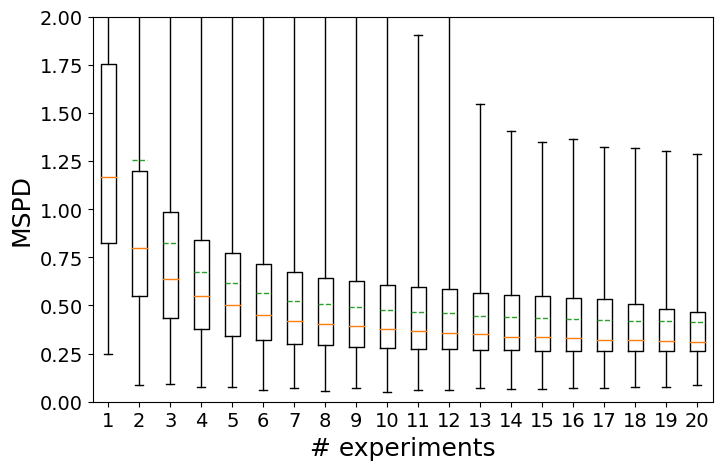

In [80]:
# MSPD boxplots over # of experiments

MSPD = [infer_out_all[infer_out_all.n_init_cond==i]["MSPD"].values \
        for i in infer_out_all.n_init_cond.unique()]

plt.figure(figsize=(8,5))
plt.boxplot(MSPD, whis=(0, 100), meanline=True, showmeans=True)
plt.xlabel("# experiments", fontsize=18)
plt.ylabel("MSPD", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.yscale("log")
plt.ylim(0, 2)
plt.show()